<a href="https://colab.research.google.com/github/Ravindrakumarnayak/Machine_learning/blob/main/forcasting_survival_analysis_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
!pip install lifelines


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from lifelines import KaplanMeierFitter

In [31]:
survival_unemp=pd.read_csv("/content/survival_unemployment.csv")
survival_unemp

,spell,event,ui,logwage,age
0,5,1,0,6.89568,41
1,13,1,1,5.28827,30
2,21,1,1,6.76734,36
3,3,1,1,5.97889,26
4,9,0,1,6.31536,22
...,...,...,...,...,...
3338,11,0,1,5.69373,41
3339,4,0,1,5.92959,27
3340,5,0,1,5.80513,30
3341,1,1,0,5.24175,29


In [32]:
survival_unemp.head()


,spell,event,ui,logwage,age
0,5,1,0,6.89568,41
1,13,1,1,5.28827,30
2,21,1,1,6.76734,36
3,3,1,1,5.97889,26
4,9,0,1,6.31536,22


In [33]:
survival_unemp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3343 entries, 0 to 3342
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   spell    3343 non-null   int64  
 1   event    3343 non-null   int64  
 2   ui       3343 non-null   int64  
 3   logwage  3343 non-null   float64
 4   age      3343 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 130.7 KB


In [34]:
T= survival_unemp.spell

In [35]:
T

0        5
1       13
2       21
3        3
4        9
        ..
3338    11
3339     4
3340     5
3341     1
3342     8
Name: spell, Length: 3343, dtype: int64

In [36]:
kmf= KaplanMeierFitter()

In [37]:

kmf.fit(T, event_observed=survival_unemp.event)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 3343 total observations, 2270 right-censored observations>

<Axes: xlabel='timeline'>

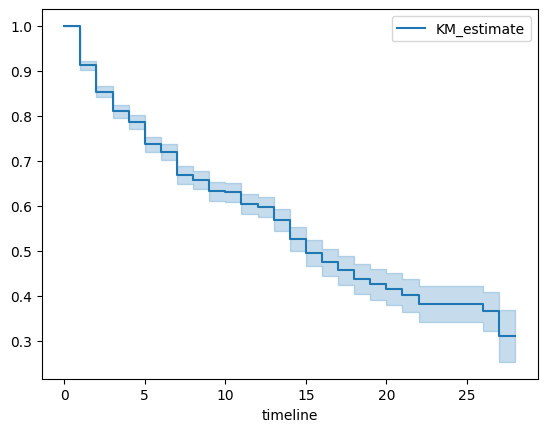

In [38]:
kmf.plot()

In [39]:
survival_unemp.ui.value_counts()

1    1848
0    1495
Name: ui, dtype: int64

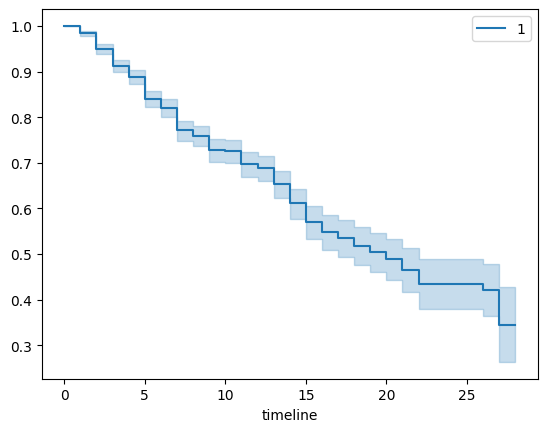

In [40]:
kmf.fit(T[survival_unemp.ui==1], survival_unemp.event[survival_unemp.ui==1], label='1')
ax=kmf.plot()


<Axes: xlabel='timeline'>

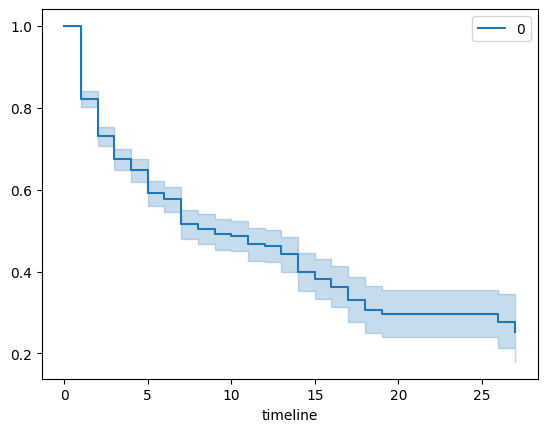

In [41]:
kmf.fit(T[survival_unemp.ui==0],survival_unemp.event[survival_unemp.ui==0], label='0')
kmf.plot()

<Axes: xlabel='timeline'>

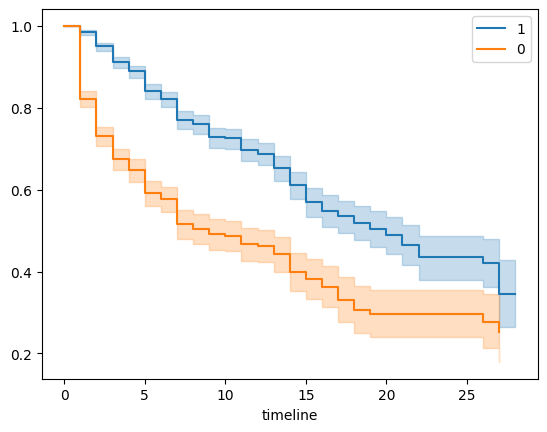

In [42]:
kmf.fit(T[survival_unemp.ui==1], survival_unemp.event[survival_unemp.ui==1], label='1')
ax=kmf.plot()

kmf.fit(T[survival_unemp.ui==0],survival_unemp.event[survival_unemp.ui==0], label='0')
kmf.plot()